1. データ取得
2. 移動平均線
3. 会社同士の株価を比較
4. 相関の計算

# 株式市場


In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
from pandas_datareader import data, wb

In [4]:
from datetime import datetime

In [5]:
import quandl

In [6]:
tech_list = ['AAPL','GOOG','MSFT','AMZN']

In [7]:
end = datetime.now()
start = datetime(end.year-1,end.month,end.day)

In [8]:
mydata = quandl.get('WIKI/AAPL',start_date=start,end_date=end)

In [9]:
mydata.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2016-07-11,96.75,97.65,96.73,96.98,23794945.0,0.0,1.0,94.936216,95.819344,94.916591,95.161904,23794945.0
2016-07-12,97.17,97.70,97.12,97.42,24167463.0,0.0,1.0,95.348343,95.868407,95.299280,95.593656,24167463.0
2016-07-13,97.41,97.67,96.84,96.87,25892171.0,0.0,1.0,95.583843,95.838969,95.024529,95.053967,25892171.0
2016-07-14,97.39,98.99,97.32,98.79,38918997.0,0.0,1.0,95.564218,97.134223,95.495530,96.937972,38918997.0
2016-07-15,98.92,99.30,98.50,98.78,30136990.0,0.0,1.0,97.065535,97.438411,96.653409,96.928160,30136990.0


In [10]:
mydata.tail()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2017-07-03,144.88,145.3001,143.1000,143.50,14276812.0,0.0,1.0,144.88,145.3001,143.1000,143.50,14276812.0
2017-07-05,143.69,144.7900,142.7237,144.09,20758795.0,0.0,1.0,143.69,144.7900,142.7237,144.09,20758795.0
2017-07-06,143.02,143.5000,142.4100,142.73,23374374.0,0.0,1.0,143.02,143.5000,142.4100,142.73,23374374.0
2017-07-07,142.90,144.7500,142.9000,144.18,18505351.0,0.0,1.0,142.90,144.7500,142.9000,144.18,18505351.0
2017-07-10,144.11,145.9500,143.3700,145.06,21030466.0,0.0,1.0,144.11,145.9500,143.3700,145.06,21030466.0


In [11]:
tech_list_new = []
for ticker in tech_list:
    tech_list_new.append('WIKI/'+ticker)

tech_list_new

['WIKI/AAPL', 'WIKI/GOOG', 'WIKI/MSFT', 'WIKI/AMZN']

In [12]:
for stock in tech_list:
    ticker = 'WIKI/' + stock
    globals()[stock] = quandl.get(ticker,start_date = start,
                                 end_date = end)

In [13]:
type(AAPL)

pandas.core.frame.DataFrame

In [14]:
AAPL.describe()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000,252.0,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,125.414871,126.279868,124.677304,125.564547,3.029247e+07,0.009286,1.0,124.502557,125.360800,123.770013,124.650713,3.029247e+07
std,17.305226,17.302802,17.164221,17.232677,1.412731e+07,0.073335,0.0,17.812011,17.814595,17.666320,17.739632,1.412731e+07
min,96.750000,97.650000,96.420000,96.670000,1.147592e+07,0.000000,1.0,94.936216,95.819344,94.612403,94.857716,1.147592e+07
25%,110.676250,111.667500,109.690000,111.052500,2.203384e+07,0.000000,1.0,109.752753,110.735732,108.774733,110.062879,2.203384e+07
50%,118.065000,118.995000,117.695000,118.620000,2.635598e+07,0.000000,1.0,116.777312,117.739302,116.412268,117.461638,2.635598e+07
75%,142.910000,143.594800,141.937500,142.512500,3.376048e+07,0.000000,1.0,142.434624,143.310440,141.503911,142.349126,3.376048e+07
max,156.010000,156.650000,155.050000,156.100000,1.123403e+08,0.630000,1.0,156.010000,156.650000,155.050000,156.100000,1.123403e+08


In [15]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2016-07-11 to 2017-07-10
Data columns (total 12 columns):
Open           252 non-null float64
High           252 non-null float64
Low            252 non-null float64
Close          252 non-null float64
Volume         252 non-null float64
Ex-Dividend    252 non-null float64
Split Ratio    252 non-null float64
Adj. Open      252 non-null float64
Adj. High      252 non-null float64
Adj. Low       252 non-null float64
Adj. Close     252 non-null float64
Adj. Volume    252 non-null float64
dtypes: float64(12)
memory usage: 25.6 KB


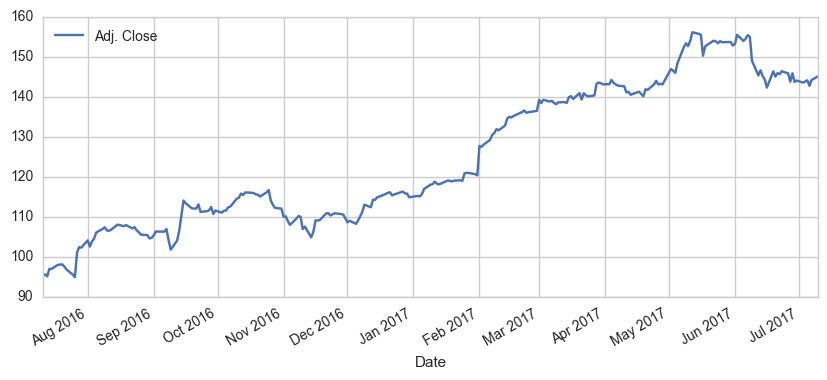

In [16]:
AAPL['Adj. Close'].plot(legend=True, figsize=(10,4))

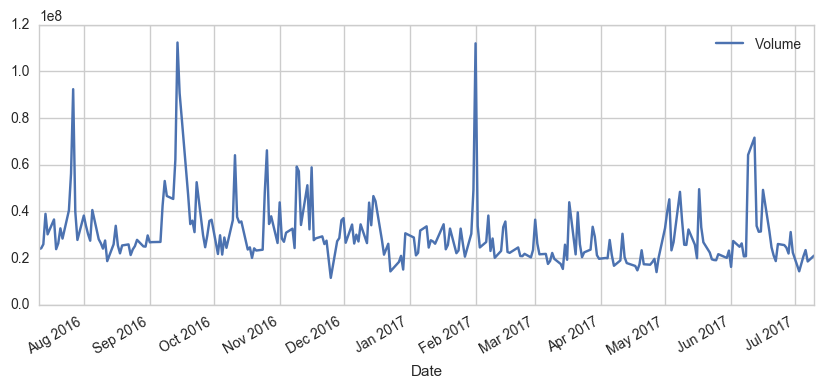

In [17]:
AAPL['Volume'].plot(legend=True, figsize=(10,4))

移動平均：10日間とかで平均して滑かにする

In [18]:
ma_day = [10,20,50]
for ma in ma_day:
    column_name = 'MA {}'.format(ma)
    AAPL[column_name] = AAPL['Adj. Close'].rolling(window=ma, 
                                       min_periods = 5,
                                       center=False).mean()

In [19]:
AAPL.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,MA 10,MA 20,MA 50
Date,,,,,,,,,,,,,,,
2016-07-11,96.75,97.65,96.73,96.98,23794945.0,0.0,1.0,94.936216,95.819344,94.916591,95.161904,23794945.0,NaN,NaN,NaN
2016-07-12,97.17,97.70,97.12,97.42,24167463.0,0.0,1.0,95.348343,95.868407,95.299280,95.593656,24167463.0,NaN,NaN,NaN
2016-07-13,97.41,97.67,96.84,96.87,25892171.0,0.0,1.0,95.583843,95.838969,95.024529,95.053967,25892171.0,NaN,NaN,NaN
2016-07-14,97.39,98.99,97.32,98.79,38918997.0,0.0,1.0,95.564218,97.134223,95.495530,96.937972,38918997.0,NaN,NaN,NaN
2016-07-15,98.92,99.30,98.50,98.78,30136990.0,0.0,1.0,97.065535,97.438411,96.653409,96.928160,30136990.0,95.935132,95.935132,95.935132


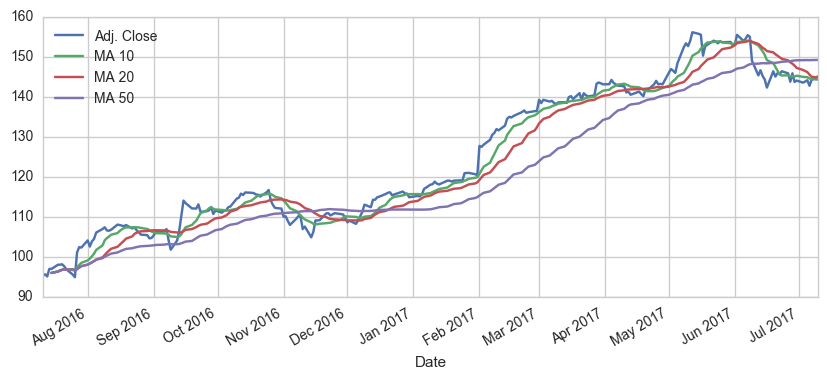

In [20]:
AAPL[['Adj. Close','MA 10','MA 20','MA 50']].plot(subplots = False,figsize=(10,4))

In [21]:
AAPL['Daily Return']= AAPL['Adj. Close'].pct_change()

In [22]:
AAPL.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume,MA 10,MA 20,MA 50,Daily Return
Date,,,,,,,,,,,,,,,,
2016-07-11,96.75,97.65,96.73,96.98,23794945.0,0.0,1.0,94.936216,95.819344,94.916591,95.161904,23794945.0,NaN,NaN,NaN,NaN
2016-07-12,97.17,97.70,97.12,97.42,24167463.0,0.0,1.0,95.348343,95.868407,95.299280,95.593656,24167463.0,NaN,NaN,NaN,0.004537
2016-07-13,97.41,97.67,96.84,96.87,25892171.0,0.0,1.0,95.583843,95.838969,95.024529,95.053967,25892171.0,NaN,NaN,NaN,-0.005646
2016-07-14,97.39,98.99,97.32,98.79,38918997.0,0.0,1.0,95.564218,97.134223,95.495530,96.937972,38918997.0,NaN,NaN,NaN,0.019820
2016-07-15,98.92,99.30,98.50,98.78,30136990.0,0.0,1.0,97.065535,97.438411,96.653409,96.928160,30136990.0,95.935132,95.935132,95.935132,-0.000101


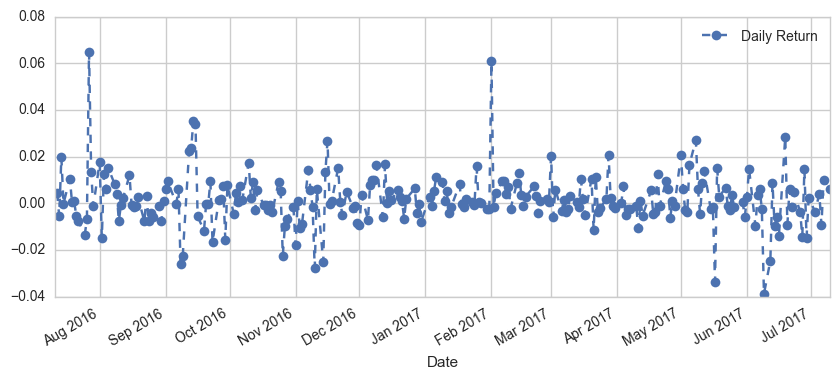

In [23]:
AAPL['Daily Return'].plot(figsize=(10,4),legend=True, linestyle="--",marker="o")

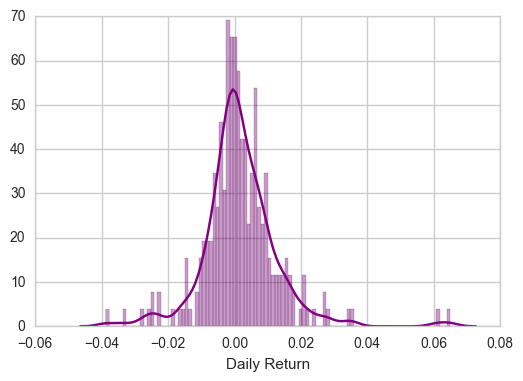

In [24]:
sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')

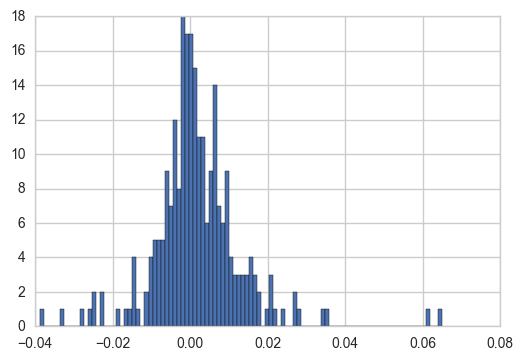

In [25]:
AAPL['Daily Return'].hist(bins=100)

In [26]:
tech_list_new = []
for ticker in tech_list:
    tech_list_new.append('WIKI/'+ticker+'.4')

tech_list_new

['WIKI/AAPL.4', 'WIKI/GOOG.4', 'WIKI/MSFT.4', 'WIKI/AMZN.4']

In [27]:
closing_df = quandl.get(tech_list_new, start_date = start, end_date = end)

In [29]:
closing_df.head()

,WIKI/AAPL - Close,WIKI/GOOG - Close,WIKI/MSFT - Close,WIKI/AMZN - Close
Date,,,,
2016-07-11,96.98,715.09,52.59,753.78
2016-07-12,97.42,720.64,53.21,748.21
2016-07-13,96.87,716.98,53.51,742.63
2016-07-14,98.79,720.95,53.74,741.20
2016-07-15,98.78,719.85,53.70,735.44


In [30]:
tech_rets = closing_df.pct_change()

In [31]:
tech_rets.head()

,WIKI/AAPL - Close,WIKI/GOOG - Close,WIKI/MSFT - Close,WIKI/AMZN - Close
Date,,,,
2016-07-11,NaN,NaN,NaN,NaN
2016-07-12,0.004537,0.007761,0.011789,-0.007389
2016-07-13,-0.005646,-0.005079,0.005638,-0.007458
2016-07-14,0.019820,0.005537,0.004298,-0.001926
2016-07-15,-0.000101,-0.001526,-0.000744,-0.007771


In [32]:
tech_rets.columns = tech_list

In [34]:
tech_rets.head()

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2016-07-11,NaN,NaN,NaN,NaN
2016-07-12,0.004537,0.007761,0.011789,-0.007389
2016-07-13,-0.005646,-0.005079,0.005638,-0.007458
2016-07-14,0.019820,0.005537,0.004298,-0.001926
2016-07-15,-0.000101,-0.001526,-0.000744,-0.007771


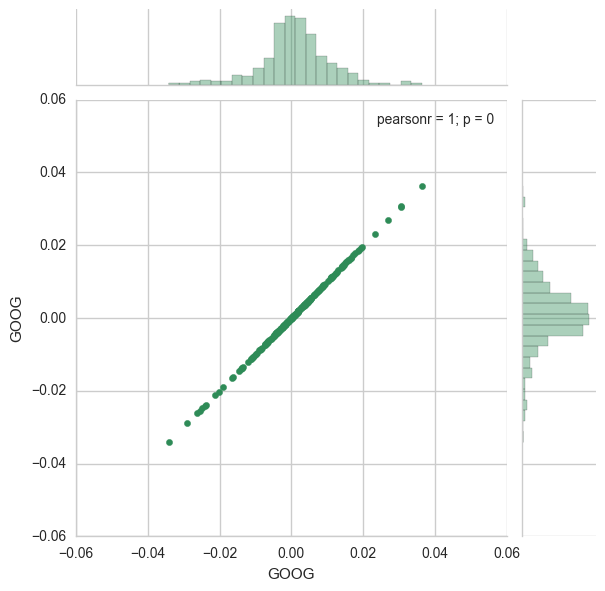

In [36]:
sns.jointplot('GOOG','GOOG',tech_rets, kind='scatter',color='seagreen')

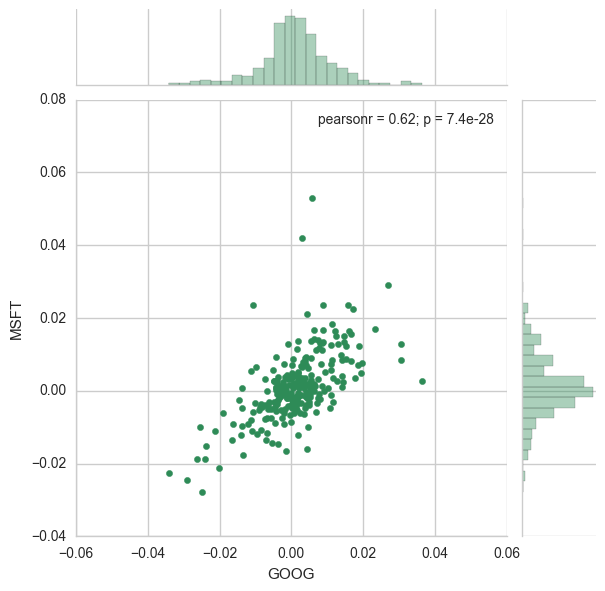

In [38]:
sns.jointplot('GOOG','MSFT',tech_rets, kind='scatter',color='seagreen')

In [42]:
sns.pairplot('GOOG','MSFT',tech_rets)

IndexError: index out of range

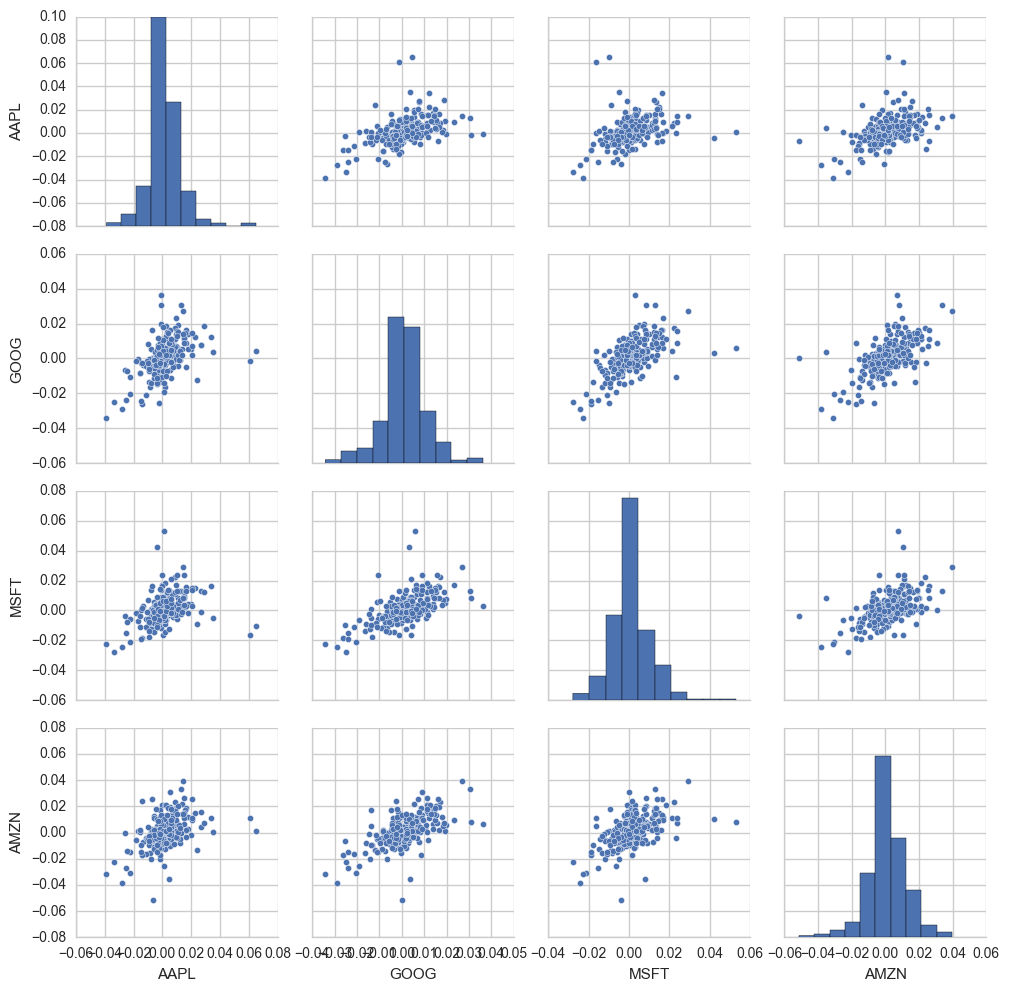

In [43]:
sns.pairplot(tech_rets.dropna())

/Users/shotashimizu/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/shotashimizu/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


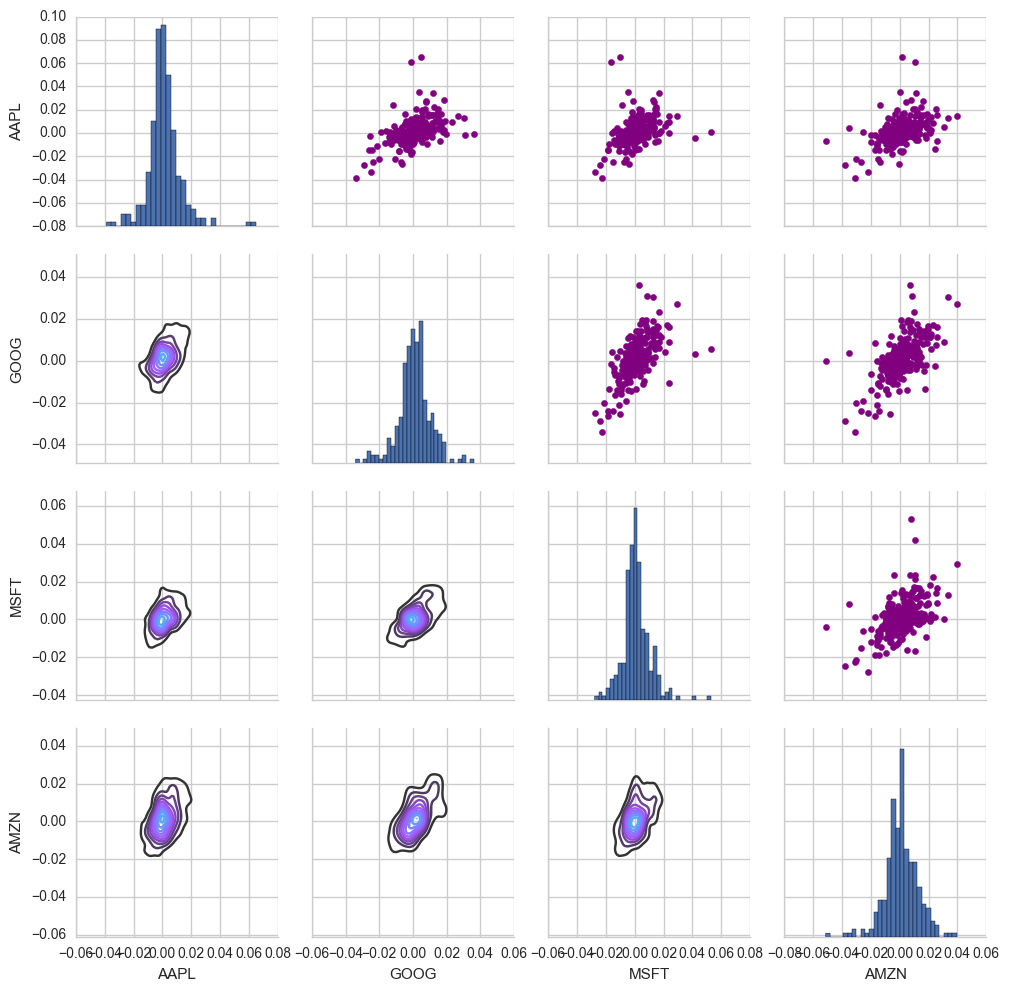

In [45]:
return_fig = sns.PairGrid(tech_rets.dropna())
return_fig.map_upper(plt.scatter, color="purple")
return_fig.map_lower(sns.kdeplot, cmap='cool_d')
return_fig.map_diag(plt.hist,bins=30)

/Users/shotashimizu/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/shotashimizu/.pyenv/versions/anaconda3-4.2.0/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


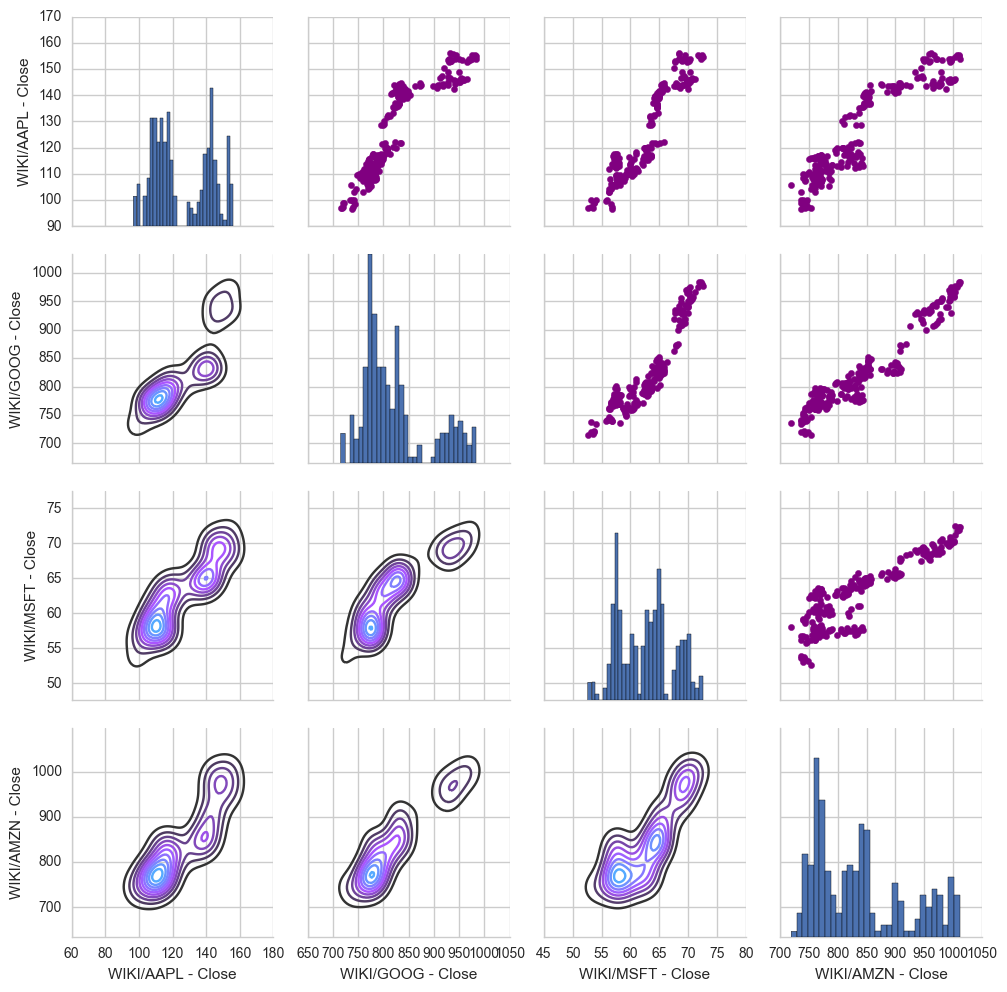

In [46]:
return_fig = sns.PairGrid(closing_df)
return_fig.map_upper(plt.scatter, color="purple")
return_fig.map_lower(sns.kdeplot, cmap='cool_d')
return_fig.map_diag(plt.hist,bins=30)

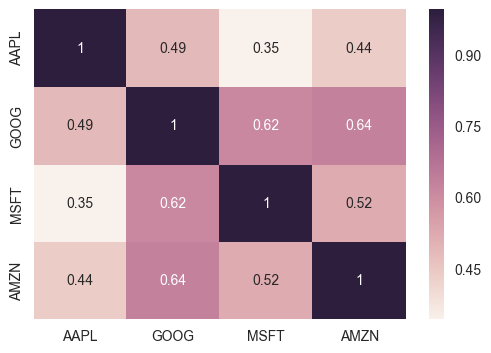

In [47]:
sns.heatmap(tech_rets.corr(),annot=True)

In [48]:
rets = tech_rets.dropna()

In [49]:
rets.head()

,AAPL,GOOG,MSFT,AMZN
Date,,,,
2016-07-12,0.004537,0.007761,0.011789,-0.007389
2016-07-13,-0.005646,-0.005079,0.005638,-0.007458
2016-07-14,0.019820,0.005537,0.004298,-0.001926
2016-07-15,-0.000101,-0.001526,-0.000744,-0.007771
2016-07-18,0.010630,0.019351,0.004842,0.000857


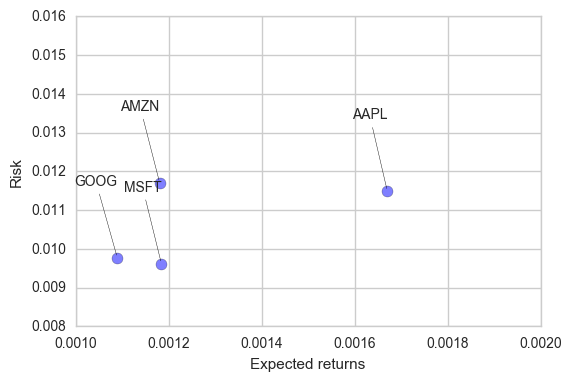

In [57]:
plt.scatter(rets.mean(), rets.std(), alpha=.5,s=np.pi*20)
plt.ylim([0.008,0.016])
plt.xlim([0.001,0.002])

plt.xlabel("Expected returns")
plt.ylabel("Risk")

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label,xy=(x,y),xytext=(0,50),
                textcoords = 'offset points',ha='right',va='bottom',
                arrowprops = dict(arrowstyle='-',connectionstyle = 'arc3'))

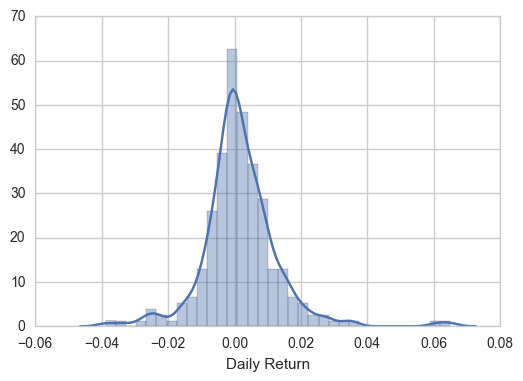

In [58]:
sns.distplot(AAPL['Daily Return'].dropna())

In [59]:
rets['AAPL'].quantile(0.05)

-0.014773765853383136

In [62]:
days= 365
dt=1/days
mu = rets.mean()['GOOG']
sigma = rets.std()['GOOG']

In [75]:
def stock_monte_carlo(start_price,days,mu,sigma):
    price = np.zeros(days)
    price[0] = start_price
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu*dt, scale=sigma*np.sqrt(dt))
        drift[x] = mu*dt
        
        price[x] = price[x-1] + (price[x-1]*(drift[x]+shock[x]))
    return price

In [64]:
GOOG.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2016-07-11,708.05,716.51,707.240,715.09,1111762.0,0.0,1.0,708.05,716.51,707.240,715.09,1111762.0
2016-07-12,719.12,722.94,715.910,720.64,1336921.0,0.0,1.0,719.12,722.94,715.910,720.64,1336921.0
2016-07-13,723.62,724.00,716.850,716.98,935876.0,0.0,1.0,723.62,724.00,716.850,716.98,935876.0
2016-07-14,721.58,722.21,718.030,720.95,950193.0,0.0,1.0,721.58,722.21,718.030,720.95,950193.0
2016-07-15,725.73,725.74,719.055,719.85,1279339.0,0.0,1.0,725.73,725.74,719.055,719.85,1279339.0


In [68]:
start_price = GOOG.iloc[0,10] #'Adj. Close'

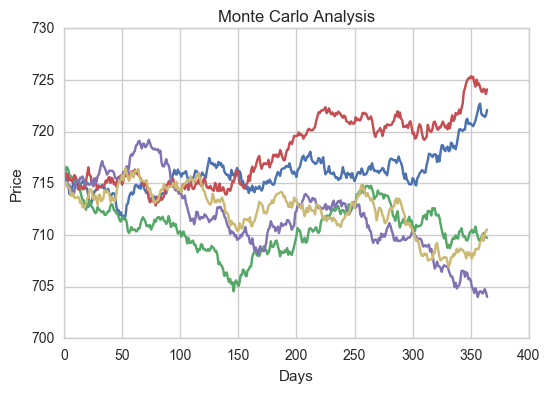

In [76]:
for run in range(5):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))

plt.xlabel('Days')
plt.ylabel('Price')
plt.title("Monte Carlo Analysis")

In [70]:
start_price

715.09000000000003

In [71]:
mu

0.0010898438998775742

In [72]:
sigma

0.0097690412584860564

In [73]:
dt

0.0027397260273972603

In [77]:
runs = 10000
simulations = np.zeros(runs)
np.set_printoptions(threshold=5)
for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days-1]

(array([ 1.,  0.,  0., ...,  0.,  0.,  1.]),
 array([ 692.48015844,  692.73252289,  692.98488734, ...,  742.44831933,
         742.70068378,  742.95304823]),
 <a list of 200 Patch objects>)

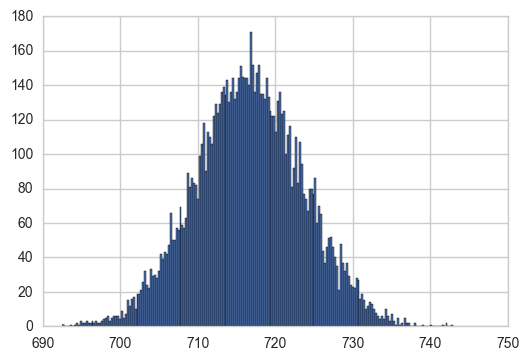

In [78]:
plt.hist(simulations, bins=200)

In [79]:
q = np.percentile(simulations,1)

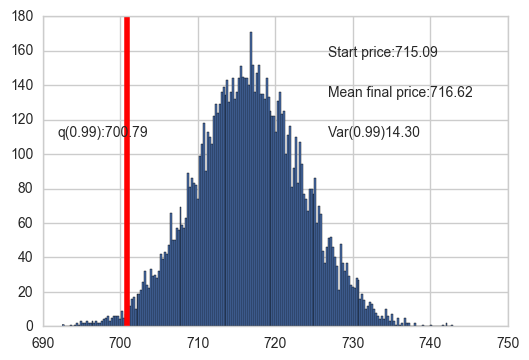

In [83]:
plt.hist(simulations,bins=200)

plt.figtext(0.6,0.8,s='Start price:{:0.2f}'.format(start_price))
plt.figtext(0.6,0.7,s='Mean final price:{:0.2f}'.format(simulations.mean()))
plt.figtext(0.6,0.6, 'Var(0.99){:0.2f}'.format(start_price-q))
plt.figtext(.15,.6,'q(0.99):{:0.2f}'.format(q))

plt.axvline(x=q,linewidth=4, color='r')